<font color = green >

# Deep learning

</font>


<img src = "img/deep_learning/19_1.png">


<font color = green >

## Notation

</font>

$n_{x}$ - number of features <br>
$m$ - number of samples<br>
$X$ - input features of shape = $(n_{x}, m)$ <br> 
$Y$ - labels of shape = $(1, m)$ <br> 
$L$ - number of layers (excluding input layer)<br> 
Index $[l]$ corresponds to layer number $l \in (1...L)$ <br> 
Index $(i)$ corresponds to sample number $i \in (1,m) $<br> 
Bottom index corresponds to unit number e.g. $a^{[2](3)}_{4}$ is the 4th activation unit in 2nd layer of 3rd sample<br> 
$n^{[l]}$  - number of units in layer $l$<br> 
$g^{[l]}$ - activation function of layer $l$ <br>
$A^{[l]} = g^{[l]}(Z^{[l]})$  - pos-activation values of layer $l \in (1...L)$  ($A^{[0]} = X$ ) <br>
$W^{[l]}$ and $b^{[l]} $  - weights and bias of layer $l$






<font color = green >
    
## Shapes

</font>

#### Sample for 4 layer neural network 


<img src = "img/deep_learning/19_2.png" align = 'left'>
<br>$
\quad n^{[0]} = n_{x} =  2\\
\quad n^{[1]} = 3\\
\quad n^{[2]} = 5\\
\quad n^{[3]} = 4\\
\quad n^{[4]} = 2\\
\quad n^{[5
]} = 1$

<div style="clear:left;"></div>




Shape of $\quad W^{[1]} = (n^{[1]}, n^{[0]}) = (3,2)\quad\quad\quad$     Shape of $\quad b^{[1]} = (n^{[1]}, 1) = (3,1)$ <br>
Shape of $\quad W^{[2]} = (n^{[2]}, n^{[1]})= (5,3)\quad\quad\quad$     Shape of $\quad b^{[2]} = (n^{[2]}, 1) = (5,1)$ <br>
Shape of $\quad W^{[3]} = (n^{[3]}, n^{[2]})= (4,5)\quad\quad\quad$     Shape of $\quad b^{[3]} = (n^{[3]}, 1) = (4,1)$ <br>
Shape of $\quad W^{[4]} = (n^{[4]}, n^{[3]})= (2,4)\quad\quad\quad$     Shape of $\quad b^{[4]} = (n^{[4]}, 1) = (2,1)$ <br>
Shape of $\quad W^{[5]} = (n^{[5]}, n^{[4]})= (1,2)\quad\quad\quad$     Shape of $\quad b^{[5]} = (n^{[5]}, 1) = (1,1)$ <br>
<br>In general:
<br>Shape of $\quad W^{[l]} = (n^{[l]}, n^{[l-1]})\,\quad$     Shape of $\quad b^{[l]} = (n^{[l]}, 1)$ 

<br>Shape of $$\quad A^{[l]}, Z^{[l]}, \frac{d\mathcal{L}}{\partial a^{[l]}}, \frac{\partial\mathcal{L}}{\partial z^{[l]}} = (n^{[l]}, m) \quad,\quad  \frac{\partial \mathcal{L}}{\partial b^{[l]}} = (n^{[l]}, 1)$$

<font color = green >
    
## Forward propagation 

</font>

Whole process: 
\[LINEAR -> RELU\] $\times$ (L-1) -> \[LINEAR -> SIGMOID\]


$A^{[0]} = X$ - input layer 

Iterate for all $l \in (1.. L)$:

$\quad\quad\quad A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$, where $g(Z)$ is one of activation functions: 

$$\sigma(Z) = \frac{1}{ 1 + e^{-Z}}, \quad\quad\quad RELU(Z) = max(0, Z)$$

$\hat{Y} = A^{[L]}$ - output layer (predicted value)


<font color = green >
    
## Cost Function


</font>

$$ \mathcal{L} = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$



<font color = green >
    
## Backward propagation

</font>

Compute the derivative for last layer: 
$$\frac{\partial \mathcal{L}}{dA^{[L]}} =  -\frac{Y}{A^{[L]}} + \frac{1 - Y}{1 - A^{[L]}}$$

Iterate through all layres back:

$$ \frac{\partial \mathcal{L} }{\partial Z^{[l]}} = \frac{\partial \mathcal{L} }{\partial A^{[l]}} \cdot 
\frac{\partial g^{[L]}}{\partial z}(Z^{[L]}); \quad 
\sigma\,(z)=\frac {1}{1+{e}^{-z}} \Rightarrow 
\frac { d\sigma }{ dz } = \sigma(z)(1-\sigma(z));
\quad  
RELU(z) = max(0, z)\Rightarrow 
\frac { d}{dz}(RELU) = \begin{cases} 0, z \le 0 \\ 1,\quad z > 0\quad \end{cases}
\\ \quad \\
\frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} \frac{\partial \mathcal{L} }{\partial Z^{[l]}} \,@\, A^{[l-1] T} \quad \quad  
\frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} \frac{\partial \mathcal{L} }{\partial Z^{[l]}} \quad (axis=1)\quad \quad  
\frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} \,@\, \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$$

<br>
<br>


<font color = green >
    
## Forward and backward propagation diagram

</font>


<img src = "img/deep_learning/19_forward_backward.png" align = 'left'>


$$\quad$$

Note: It may be worth to cashe the $b^{[l]}$ parameters with other $ W^{[l]} ,A^{[l-1]}, Z^{[l]}$ to make sure the shape of $\frac {\partial\mathcal{L}}{\partial b^{[l]}}$ is the same as shape of $b^{[l]}$.

<font color = green >
    
## Garadient descent 

</font>

For  $l \in (1.. L)$:

$$W^{[l]}  = W^{[l]} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial W^{[l]}} \quad\quad
b^{[l]}  = b^{[l]} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b^{[l]}}$$




In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
%matplotlib notebook

<font color = green >
    
## Implementation steps 

</font>

 - Prepare data 
 - Initialize parameters 
 - Implement forward propagation step 
 - Сompute сost
 - Init backward propagation
 - Implement backward propagation step
 - Update parameters in gradient descent 
 - (Build two-layer model)
 - Train model 
 - Evaluate model
 - Implement forward propagation whole process 
 - Implement backward propagation whole process 
 - Build deep neural network model 
 - Predict 



<font color = green >

## Prepare data

</font>

Cat vs Non-cat

<font color = green >

### Load data

</font>

Cat vs Non-cat

In [3]:
import os
cwd = os.getcwd() # current working directory
path = os.path.join(cwd,'data')

In [4]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    file_name =  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']

    return X_train, Y_train, X_test, Y_test, classes

<font color = green >

###  Review samples

</font>


In [5]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

<IPython.core.display.Javascript object>


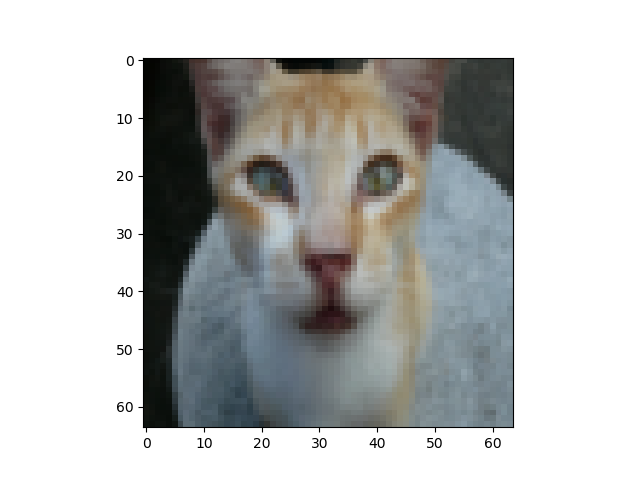

y = 1, it's a 'cat' picture


In [6]:
index = 11
plt.imshow(X_train[index])
print("y = {}, it's a '{}' picture".format(Y_train[index], classes[Y_train[index]]))
# Implement the code to review the picture with index = 11 and print the labeled class 

<font color = blue >

###  Expected result

</font>

<img src = "img/deep_learning/cat_11.png" >

y = 1, it's a 'cat' picture.

<font color = green >

###  Analyze dimensions   

</font>


In [7]:
# Implement the code to print the outpus provided in expected result
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)
print("Y_train.shape = ", Y_train.shape)
print("Y_test.shape = ", Y_test.shape)
print("Number of training examples: m_train  = ", m_train)
print("Number of testing examples: m_test  = ", m_test)
print("Height/Width of each image: num_px  = ", num_px)
print("Each image is of size: ", X_train[0].shape)

X_train.shape =  (209, 64, 64, 3)
X_test.shape =  (50, 64, 64, 3)
Y_train.shape =  (209,)
Y_test.shape =  (50,)
Number of training examples: m_train  =  209
Number of testing examples: m_test  =  50
Height/Width of each image: num_px  =  64
Each image is of size:  (64, 64, 3)


<font color = blue >

###  Expected result

</font>

`
X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209,)
Y_test.shape=  (50,)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)`



<font color = green >

###  Reshape data

</font>

$X$ - input features of shape = $(n_{x}, m)$ <br> 
$Y$ - labels of shape = $(1, m)$ <br> 


In [8]:
# Reshape the data 
X_train_flatten = X_train.reshape(m_train, -1).T
Y_train_flatten = Y_train.reshape(1,-1)
X_test_flatten = X_test.reshape(m_test, -1).T
Y_test_flatten = Y_test.reshape(1,-1)

print("X_train_flatten shape: ", X_train_flatten.shape)
print("Y_train shape: ", Y_train_flatten.shape)
print("X_test_flatten shape: ", X_test_flatten.shape)
print("Y_test shape: ", Y_test_flatten.shape)

X_train_flatten shape:  (12288, 209)
Y_train shape:  (1, 209)
X_test_flatten shape:  (12288, 50)
Y_test shape:  (1, 50)


<font color = blue >

###  Expected result

</font>

`X_train_flatten shape: (12288, 209)
Y_train shape: (1, 209)
X_test_flatten shape: (12288, 50)
Y_test shape: (1, 50)`



<font color = green >

###  Scale data

</font>


In [9]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

<font color = green >
    
## Initialize parameters

</font>
<br>Shape of $\quad W^{[l]} = (n^{[l]}, n^{[l-1]})\,\quad$     Shape of $\quad b^{[l]} = (n^{[l]}, 1)$ 

Note: Initialization of $W = random  \,/   \sqrt{ n^{[l-1]} }  $ 

In [10]:
def initialize_parameters(layer_dims):
    """
    layer_dims - list containing the dimensions of each layer in our network including input layer e.g. [12288,7,1]
    Returns: dictionary with keys "W" and "b" and their values are dicts with keys corresponding to layers numbers.
        for 'W' - value for every layer is weight matrix of shape (layer_dims[l], layer_dims[l-1])
        for 'b' - bias vector of shape (layer_dims[l], 1)
    """    
    np.random.seed(1)
    parameters = {'W':{}, 'b':{}}

    # Implement initialization using np.random.randn to match expected result
    for i in range(1,len(layer_dims)):
        parameters["W"][i] = np.random.randn(layer_dims[i], layer_dims[i-1])/np.sqrt(layer_dims[i-1])
        parameters["b"][i] = np.zeros((layer_dims[i], 1))  
    return parameters

In [11]:
parameters = {'W':{}, 'b':{}}
for i in range(1,5):
    parameters["W"][i] = (i,i)
    parameters["b"][i] = i  
for i in range(1,len(parameters["W"])+1):
    print(parameters["W"][i])

(1, 1)
(2, 2)
(3, 3)
(4, 4)


In [12]:
# check the initialize_parameters()
layer_dims = [2,3,5,1] 
params = initialize_parameters(layer_dims)
for l in range(1,len(layer_dims)):
    print ('W[{0}] =\n{1}\nb[{0}] =\n{2}\n'.format(l, params['W'][l], params['b'][l]))

W[1] =
[[ 1.14858562 -0.43257711]
 [-0.37347383 -0.75870339]
 [ 0.6119356  -1.62743362]]
b[1] =
[[0.]
 [0.]
 [0.]]

W[2] =
[[ 1.00736754 -0.43948301  0.18419731]
 [-0.14397405  0.84414841 -1.18942279]
 [-0.18614766 -0.22173389  0.65458209]
 [-0.63502252 -0.09955147 -0.50683179]
 [ 0.02437212  0.33648852 -0.63544278]]
b[2] =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

W[3] =
[[ 0.51193601  0.40320363  0.2247223   0.40287503 -0.30577239]]
b[3] =
[[0.]]



<font color = blue >

###  Expected result

</font>

`W[1] =
[[ 1.14858562 -0.43257711]
 [-0.37347383 -0.75870339]
 [ 0.6119356  -1.62743362]]
b[1] =
[[0.]
 [0.]
 [0.]]
W[2] =
[[ 1.00736754 -0.43948301  0.18419731]
 [-0.14397405  0.84414841 -1.18942279]
 [-0.18614766 -0.22173389  0.65458209]
 [-0.63502252 -0.09955147 -0.50683179]
 [ 0.02437212  0.33648852 -0.63544278]]
b[2] =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W[3] =
[[ 0.51193601  0.40320363  0.2247223   0.40287503 -0.30577239]]
b[3] =
[[0.]]`



<font color = green >
    
## Forward propagation step

</font>

$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$, where $g(Z)$ is one of activation functions: 

$\sigma(Z) = \frac{1}{ 1 + e^{-Z}}, \quad\quad\quad RELU(Z) = max(0, Z)$

In [13]:
def forward_propagation_step(A_prev, W, b, activation):
    """
    A_prev - activations from previous layer: (size of previous layer, number of examples)
    W - weights matrix: array of shape (size of current layer, size of previous layer)
    b - bias vector, array of shape (size of the current layer, 1)
    activation - text string "sigmoid" or "relu"

    Returns:
    A -  post-activation value 
    cache - tuple containing W, b, A_prev, Z stored for computing the backward pass
    """
    Z = W @ A_prev + b
    if activation == "sigmoid":
        A = sigmoid(Z)
        
    elif activation == "relu":
        A = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))

    cache = (W, b, A_prev, Z) # used at backward propagation. Note: b looks as need just to check the shape of dJ_db
    return A, cache


def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)


<font color = green >
    
## Compute cost

</font>
$$ \mathcal{L} = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$



In [14]:
def compute_cost(A_last, Y):
    """
    A_last - vector of predicted probabilties - activations of last layer L, shape (1, number of examples)
    Y - true label e.g. cat vs non-cat, shape (1, number of examples)
    Returns:
    cost - cross-entropy cost
    """
    assert (A_last.shape == Y.shape)
    cost = -1/Y.shape[1] * np.sum(Y*np.log(A_last) + (1-Y)*np.log(1-A_last))
    assert(cost.shape == ()) 
    
    return cost

<font color = green >
    
## Init backward propagation 

</font>

Compute the derivative for last layer: 
$$\frac{\partial \mathcal{L}}{dA^{[L]}} =  -\frac{Y}{A^{[L]}} + \frac{1 - Y}{1 - A^{[L]}}$$



In [15]:
def init_backward_propagation(Y, A_last):
    dL_dA_last =  -(Y/A_last) + (1-Y)/(1-A_last)
    return dL_dA_last

<font color = green >
    
## Backward propagation step

</font>

$$ \frac{\partial \mathcal{L} }{\partial Z^{[l]}} = \frac{\partial \mathcal{L} }{\partial A^{[l]}} \cdot 
\frac{\partial g^{[L]}}{\partial z}(Z^{[L]}); \quad 
\frac { d\sigma }{ dz } = \sigma(z)(1-\sigma(z));
\quad  
\frac { d}{dz}(RELU) = \begin{cases} 0, z \le 0 \\ 1,\quad z > 0\quad \end{cases}
\\ \quad \\
\frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} \frac{\partial \mathcal{L} }{\partial Z^{[l]}} \,@\, A^{[l-1] T} \quad \quad  
\frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} \frac{\partial \mathcal{L} }{\partial Z^{[l]}} \quad (axis=1)\quad \quad  
\frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} \,@\, \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$$


In [16]:
def backward_propagation_step(dL_dA, cache, activation):
    """
    dL_dA - activation gradient for current layer l
    cache - (W, b, A_prev, Z) stored for current layer  l
    activation - string: "sigmoid" or "relu"
    
    Returns:
    dL_dA_prev - Gradient activation of the previous layer l-1, same shape as A_prev
    dL_dW - Gradient of W current layer l, same shape as W
    dL_db - Gradient of b (current layer l), same shape as b
    """
    W, b, A_prev, Z = cache 

    # backward activation part:
    if activation == "relu":
        dg_dz = relu_backward( Z)            
    elif activation == "sigmoid":
        dg_dz = sigmoid_backward( Z)
        
    assert (dL_dA.shape == dg_dz.shape)
    dL_dZ = dL_dA * dg_dz

    # backward linear part:
    m = A_prev.shape[1]
    
    dL_dW = 1/m * dL_dZ @ A_prev.T
    dL_db = 1/m * np.sum(dL_dZ, axis=1, keepdims= True)
    dL_dA_prev = W.T @ dL_dZ
    

    assert (dL_dA_prev.shape == A_prev.shape)
    assert (dL_dW.shape == W.shape)
    assert (dL_db.shape == b.shape)

    return dL_dA_prev, dL_dW, dL_db
        

def relu_backward(Z):
    dg_dz = (Z>0).astype(int)
    assert (dg_dz.shape == Z.shape)    
    return dg_dz



def sigmoid_backward(Z):
    dg_dz = sigmoid(Z)*(1-sigmoid(Z))
    assert (dg_dz.shape == Z.shape)    
    return dg_dz


<font color = green >
    
## Update parameters 

</font>


For  $l \in (1.. L)$:

$W^{[l]}  = W^{[l]} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial W^{[l]}} \quad\quad
b^{[l]}  = b^{[l]} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b^{[l]}}$




In [17]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters due to gradient descent rule 
    parameters - dictionary with keys 'W' and 'b' each is dict with keys of layer numbers 
    grads - dictionary with keys 'W' and 'b' each is dict with keys of layer numbers 
   
    Returns: updated parameters the same shape as input parameters 
    """
    for i in range(1, len(parameters["W"])+1):
        parameters["W"][i] -= learning_rate * grads["W"][i]
        parameters["b"][i] -= learning_rate * grads["b"][i] 
    return parameters

<font color = green >
    
## Build two-layer model

</font>

In [18]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    '''
    X - input layer of shape (input size, number of examples)
    Y - output layer of shape (1,m)
    layers_dims - list of layers dims including input layer 
    '''
  
    np.random.seed(1)
    grads = {'W':{}, 'b':{}}
    costs = []   # track the cost
    m = X.shape[1] # number of examples

    # Initialize parameters 
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)
    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.
        A1, cache1 = forward_propagation_step(X, parameters['W'][1], parameters['b'][1], 'relu')        
        A2, cache2 = forward_propagation_step(A1, parameters['W'][2], parameters['b'][2], 'sigmoid')

        # Compute cost        
        cost = compute_cost(A2, Y)
                
        # Initialize backward propagation        
        dL_dA2 = init_backward_propagation(Y, A2)

        # Backward propagation.
        dL_dA1, grads['W'][2], grads['b'][2] = backward_propagation_step(dL_dA2, cache2, 'sigmoid')
        _, grads['W'][1], grads['b'][1] = backward_propagation_step(dL_dA1, cache1, 'relu')
        
        
        # Update parameters    
        parameters =  update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.figure()
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

<font color = green >

## Train the model learning

</font>

Cost after iteration 0: 0.6950464961800915
Cost after iteration 100: 0.6195808854384666
Cost after iteration 200: 0.5865026104533535
Cost after iteration 300: 0.5467810398248232
Cost after iteration 400: 0.49825722524914073
Cost after iteration 500: 0.45657385324276334
Cost after iteration 600: 0.4094471539583378
Cost after iteration 700: 0.3631730375845946
Cost after iteration 800: 0.32861131098831003
Cost after iteration 900: 0.29718068617894683
Cost after iteration 1000: 0.269008932771751
Cost after iteration 1100: 0.24464399315834634
Cost after iteration 1200: 0.22384078814076208
Cost after iteration 1300: 0.20652180532903278
Cost after iteration 1400: 0.1893838186161027
Cost after iteration 1500: 0.17501499357058228
Cost after iteration 1600: 0.16159871226192452
Cost after iteration 1700: 0.14745343426258842
Cost after iteration 1800: 0.1347821561201472
Cost after iteration 1900: 0.1231337962128783
Cost after iteration 2000: 0.11228120642500022
Cost after iteration 2100: 0.1029651

<IPython.core.display.Javascript object>


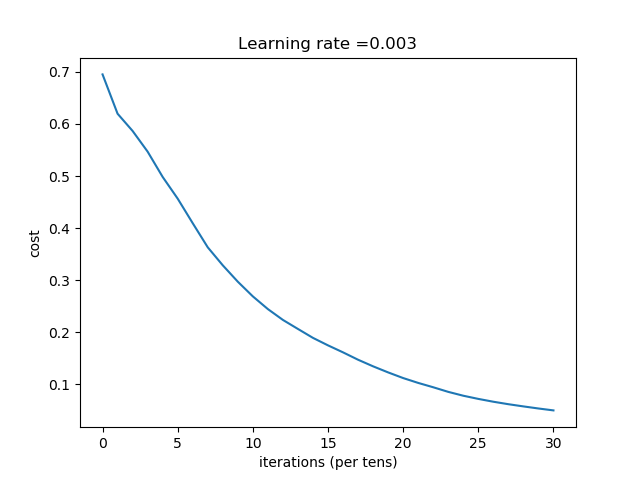

In [19]:
n_x = X_train_scaled.shape[0]
n_h = 7 
n_y = Y_train_flatten.shape[0]
layers_dims = [n_x, n_h, n_y]

parameters = two_layer_model(
   X_train_scaled, Y_train_flatten, layers_dims, learning_rate = 0.003, num_iterations = 3001, print_cost=True)

<font color = blue >

###  Expected result

</font>

`Cost after iteration 0: 0.6950464961800915
Cost after iteration 100: 0.6195808854384666
Cost after iteration 200: 0.5865026104533535
Cost after iteration 300: 0.5467810398248231
Cost after iteration 400: 0.49825722524914073
Cost after iteration 500: 0.4565738532427634
Cost after iteration 600: 0.4094471539583378
Cost after iteration 700: 0.3631730375845946
Cost after iteration 800: 0.32861131098831003
Cost after iteration 900: 0.29718068617894683
Cost after iteration 1000: 0.269008932771751
Cost after iteration 1100: 0.24464399315834634
Cost after iteration 1200: 0.22384078814076205
Cost after iteration 1300: 0.20652180532903278
Cost after iteration 1400: 0.1893838186161027
Cost after iteration 1500: 0.17501499357058234
Cost after iteration 1600: 0.16159871226192452
Cost after iteration 1700: 0.14745343426258842
Cost after iteration 1800: 0.13478215612014718
Cost after iteration 1900: 0.1231337962128783
Cost after iteration 2000: 0.11228120642500024
Cost after iteration 2100: 0.10296514643048342
Cost after iteration 2200: 0.09462444340407362
Cost after iteration 2300: 0.08577949788493319
Cost after iteration 2400: 0.07838067328265923
Cost after iteration 2500: 0.07228557169893012
Cost after iteration 2600: 0.06685754016383366
Cost after iteration 2700: 0.06210220111202463
Cost after iteration 2800: 0.05787619296178021
Cost after iteration 2900: 0.053884527381680314`

<img src = "img/deep_learning/19_check_2_layer.png">


<font color = green >
    
### Evaluate 2-layers model

</font>

In [20]:
def evaluate_two_layers(X, Y, parameters):
    """        
    X - array to predict 
    parameters - parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    #     L = len(parameters['W']) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    A1,_ = forward_propagation_step(X, parameters['W'][1], parameters['b'][1], 'relu')        
    Y_pred, _ = forward_propagation_step(A1, parameters['W'][2], parameters['b'][2], 'sigmoid')

    accuracy =  (np.mean ((Y_pred>.5)==Y))
    print("Accuracy: {:.3f}".format( accuracy))
       

evaluate_two_layers(X_train_scaled, Y_train, parameters)
test_accuracy = evaluate_two_layers(X_test_scaled, Y_test, parameters)


Accuracy: 1.000
Accuracy: 0.760


<font color = green >
    
## Forward propagation whole process

</font>

In [21]:
def forward_propagation_whole_process(X, parameters):
    """
    [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID
    X - data, array of shape (input size, number of examples)
    parameters - initialized parameters foreach of 'W' and 'b' keas values have keys 1,2,...L 
    
    Returns:
    A_last - last activation value (y_pred)
    caches - dict of caches containing every cache of forward propagation indexed from 0 to L-1
    """

    caches = {}
    A = X
    
    L = len(parameters['W']) # number of layers in the neural network

    # [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_propagation_step(A_prev, parameters['W'][l], parameters['b'][l],'relu')        
        caches[l] = cache

    
    #LINEAR -> SIGMOID
    A_last, cache = forward_propagation_step(A, parameters['W'][L], parameters['b'][L],'sigmoid')        
    caches[L] = cache

    assert(A_last.shape == (1, X.shape[1])) # (1,m) 
            
    return A_last, caches

<font color = green >
    
## Backward propagation whole process

</font>

In [22]:
def backward_propagation_whole_process(A_last, Y, caches):
    """
    backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID 
    A_last - probability vector, output(y_pred) of the forward propagation 
    Y - true labels (0 if non-cat, 1 if cat)
    caches - dict of caches for each layer that contains (W, b, A, Z)
    Returns: grads - of keys 'W' and 'b' each containing the  dictionaries of keys 1..L  
    """
    dL_dA= {}
    dL_dW = {}
    dL_db= {}
    
    L = len(caches) # the number of layers
    m = A_last.shape[1] # number of samples
    Y = Y.reshape(A_last.shape) # make sure Y is the same shape as A_last(y_pred)
    
    # Initialize the backpropagation    
    dL_dA[L] = init_backward_propagation(Y, A_last)

    # layer (SIGMOID -> LINEAR) gradients
    current_cache = caches[L] 
    dL_dA[L-1], dL_dW[L], dL_db[L] = backward_propagation_step(dL_dA[L], current_cache, activation = "sigmoid")

    # Loop from l=L-2 to l=0
    for l in reversed(range(1,L)): #  starts with L-1 ends with 1 
        # l-th layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dL_dA[l-1], dL_dW[l], dL_db[l] = backward_propagation_step(dL_dA[l], current_cache, activation = "relu")
        
    grads= {'W':dL_dW,'b': dL_db}
    
    return grads


<font color = green >
    
## Build deep neural network model 

</font>

In [23]:
def model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, verbose = False):
    """
    X - data, array of shape (number of examples, num_px * num_px * 3)
    Y - true label vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims - list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate - learning rate of the gradient descent update rule
    num_iterations - number of iterations of the optimization loop
    verbose - if True, it prints the cost every 100 steps
    
    Returns:
    parameters - parameters learnt by the model. They can then be used to predict.
    """
    print ('Training {}-layers neural network with layers dimensions: {}'.format (len(layers_dims)-1, layers_dims))
    np.random.seed(1)
    costs = [] # to track of cost
            
    parameters = initialize_parameters(layers_dims)
        
    # Loop (gradient descent)
    for i in range(num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        A_last, caches = forward_propagation_whole_process(X, parameters)
    
        # Compute cost
        cost = compute_cost(A_last, Y)

        # Backward propagation.
        grads = backward_propagation_whole_process(A_last, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
       
                
        # Print the cost every 100 training example
        if verbose and i % 100 == 0:
            print ("Cost after iteration {}: {}".format(i, cost))
        if i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.figure()
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    
    
    return parameters


<font color = green >
    
### Run for 2 layers 

</font>

Training 2-layers neural network with layers dimensions: [12288, 7, 1]
Cost after iteration 0: 0.6950464961800915
Cost after iteration 100: 0.6195808854384666
Cost after iteration 200: 0.5865026104533535
Cost after iteration 300: 0.5467810398248232
Cost after iteration 400: 0.49825722524914073
Cost after iteration 500: 0.45657385324276334
Cost after iteration 600: 0.4094471539583378
Cost after iteration 700: 0.3631730375845946
Cost after iteration 800: 0.32861131098831003
Cost after iteration 900: 0.29718068617894683
Cost after iteration 1000: 0.269008932771751
Cost after iteration 1100: 0.24464399315834634
Cost after iteration 1200: 0.22384078814076208
Cost after iteration 1300: 0.20652180532903278
Cost after iteration 1400: 0.1893838186161027
Cost after iteration 1500: 0.17501499357058228
Cost after iteration 1600: 0.16159871226192452
Cost after iteration 1700: 0.14745343426258842
Cost after iteration 1800: 0.1347821561201472
Cost after iteration 1900: 0.1231337962128783
Cost after i

<IPython.core.display.Javascript object>


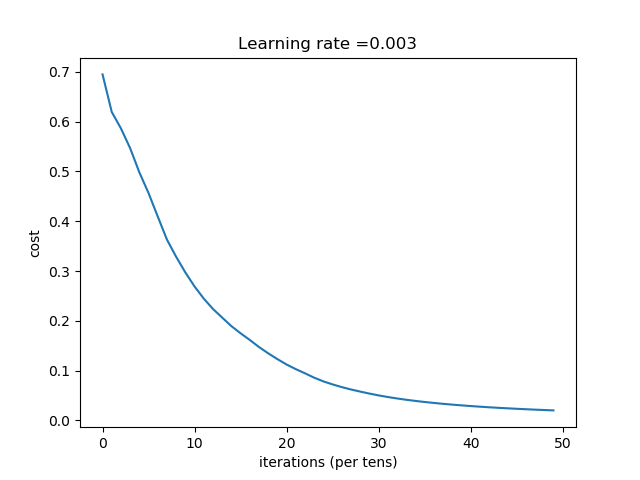

In [24]:
n_x = X_train_scaled.shape[0]
n_h= 7 
n_y = Y_train_flatten.shape[0]
layers_dims = [n_x, n_h, n_y]

parameters = model(
    X_train_scaled, Y_train_flatten, layers_dims, num_iterations = 5000, verbose = True, learning_rate = 0.003) 


<font color = blue >

###  Expected result

</font>

`Training 2-layers neural network with layers dimensions: [12288, 7, 1]
Cost after iteration 0: 0.6950464961800915
Cost after iteration 100: 0.6195808854384666
Cost after iteration 200: 0.5865026104533535
Cost after iteration 300: 0.5467810398248231
Cost after iteration 400: 0.49825722524914073
...
Cost after iteration 4500: 0.023333388131945094
Cost after iteration 4600: 0.022437269637948253
Cost after iteration 4700: 0.021604560218738137
Cost after iteration 4800: 0.02083238901344186
Cost after iteration 4900: 0.020094155779688965`

<img src = "img/deep_learning/19_check_2_layer_2.png">


<font color = green >
    
### Run for 4 layers 

</font>

Training 4-layers neural network with layers dimensions: [12288, 20, 7, 5, 1]
Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.567047326836611
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.3917469743480534
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.27269984417893856
Cost after iteration 1200: 0.23741853400268131
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463302
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.1482138966236332
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005211
Cost after 

<IPython.core.display.Javascript object>


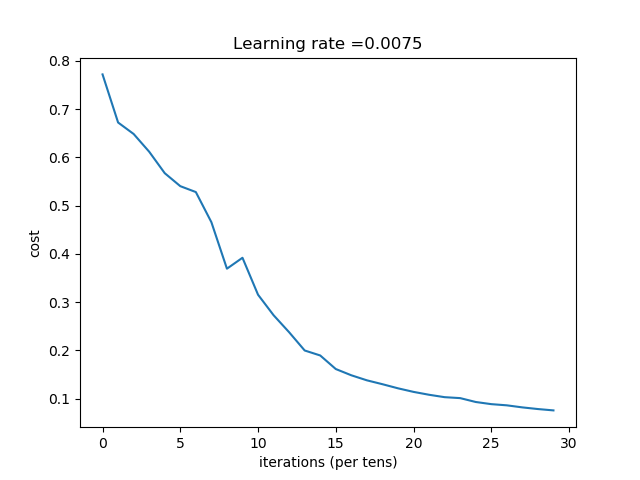

In [25]:
n_x = X_train_scaled.shape[0]
n_y = Y_train_flatten.shape[0]
layers_dims = [n_x,20,7,5,n_y]

parameters = model(
    X_train_scaled, Y_train_flatten, layers_dims, num_iterations = 3000, verbose = True, 
    learning_rate = 0.0075) 

<font color = blue >

###  Expected result

</font>

`Training 4-layers neural network with layers dimensions: [12288, 20, 7, 5, 1]
Cost after iteration 0: 0.7717493284237688
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.567047326836611
...
Cost after iteration 2500: 0.08841251177615041
Cost after iteration 2600: 0.08595130416146428
Cost after iteration 2700: 0.08168126914926334
Cost after iteration 2800: 0.07824661275815534
Cost after iteration 2900: 0.07544408693855482`

<img src = "img/deep_learning/19_check_4_layer.png">


<font color = green >
    
## Predict 

</font>

In [26]:
def predict(X, parameters):
    """        
    X - array set to predict 
    parameters - parameters of the trained model
    Returns:
    Y_pred - predictions for the given dataset X
    """

    # Forward propagation
    A_last, _ = forward_propagation_whole_process(X, parameters)
    Y_pred = (A_last>0.5).astype(int)
    
    return Y_pred

<font color = green >
    
## Evaluate

</font>

In [27]:
Y_pred_train = predict (X_train_scaled, parameters)
Y_pred_test = predict (X_test_scaled, parameters)
print ('Train accuracy = {:.3%}'.format(np.mean (Y_pred_train == Y_train_flatten)))
print ('Test accuracy = {:.3%}'.format(np.mean (Y_pred_test == Y_test_flatten)))

Train accuracy = 99.043%
Test accuracy = 82.000%


<font color = blue >

###  Expected result

</font>

`Train accuracy = 99.043%
Test accuracy = 82.000%`




<font color = green >

## Learn more

</font>



[Neural Networks and Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome)
